# **Exploratory Data Analysis**
Pada tahap ini kami melakukan EDA terhadap dataset yang telah dirubah tahunnya untuk menganalisis dan memvisualisasikan terkait dataset online retail agar dapat mengambil data yang dapat dijadikan acuan untuk membuat model RFM agar hasilnya relevan dengan use case.

In [15]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Membaca dataset
df = pd.read_csv('online_retail1.csv')

In [17]:
# Menampilkan 5 data teratas
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2024-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2024-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2024-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2024-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2024-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
# Menampilkan struktur dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [19]:
# Menampilkan struktur statistik deskriptif
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


In [20]:
# Menampilkan data yang hilang
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [21]:
# Menghitung banyaknya data yang duplikat
df.duplicated().sum()

np.int64(0)

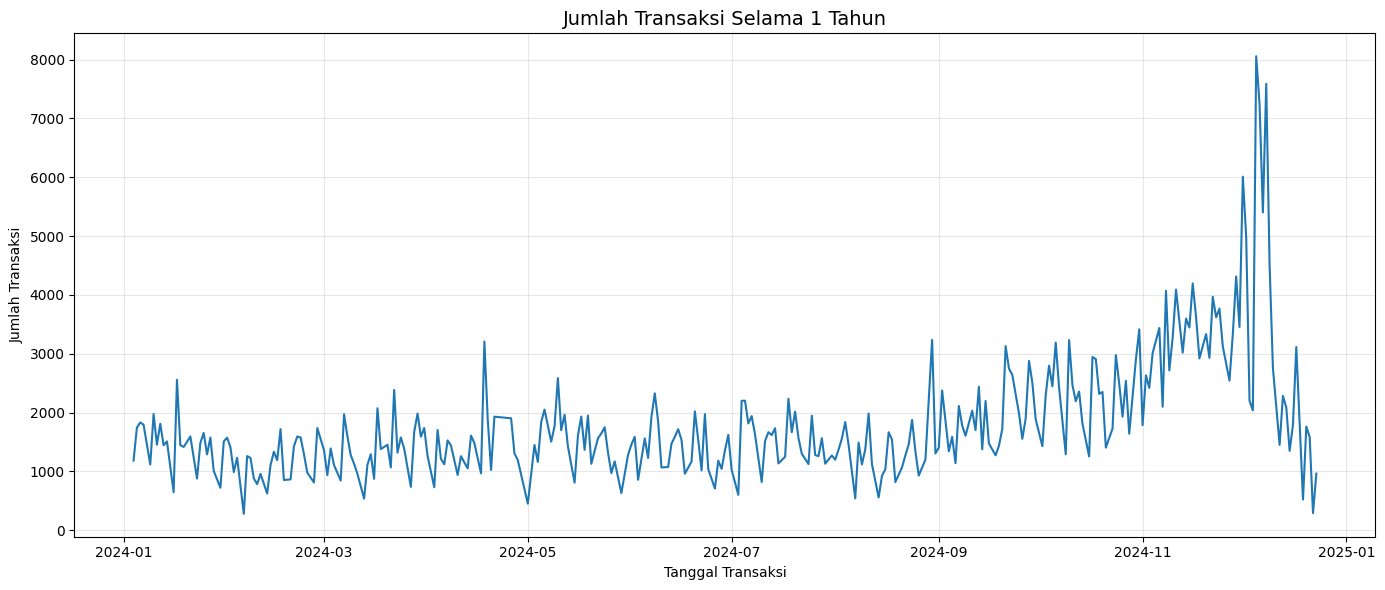

In [22]:
# Menampilkan visualisasi data jumlah transaksi selama 1 tahun

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDay'] = df['InvoiceDate'].dt.date
daily = df.groupby('InvoiceDay').size()

plt.figure(figsize=(14, 6))
plt.plot(daily.index, daily.values, linewidth=1.5)
plt.title("Jumlah Transaksi Selama 1 Tahun", fontsize=14)
plt.xlabel("Tanggal Transaksi")
plt.ylabel("Jumlah Transaksi")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# **Jumlah Transaksi Dalam 1 Tahun**
Hasil eksplorasi diatas dapat disimpulkan bahwa jumlah transaksi mengalami peningkatan signifikan dari sekitar 1000 transaksi pada awal tahun lalu mencapai puncak 4000 transaksi di akhir tahun. Meskipun terdapat fluktuasi yang cukup tinggi di awal tahun dalam kurun harian atau mingguan, namun pada awal pulan desember terjadi lonjakan tinggi dan mengalami penurunan tajam kembali di akhir desember 2024. Puncak tertinggi berada di awal bulan desember dan puncak terendah di akhir bulan desember.

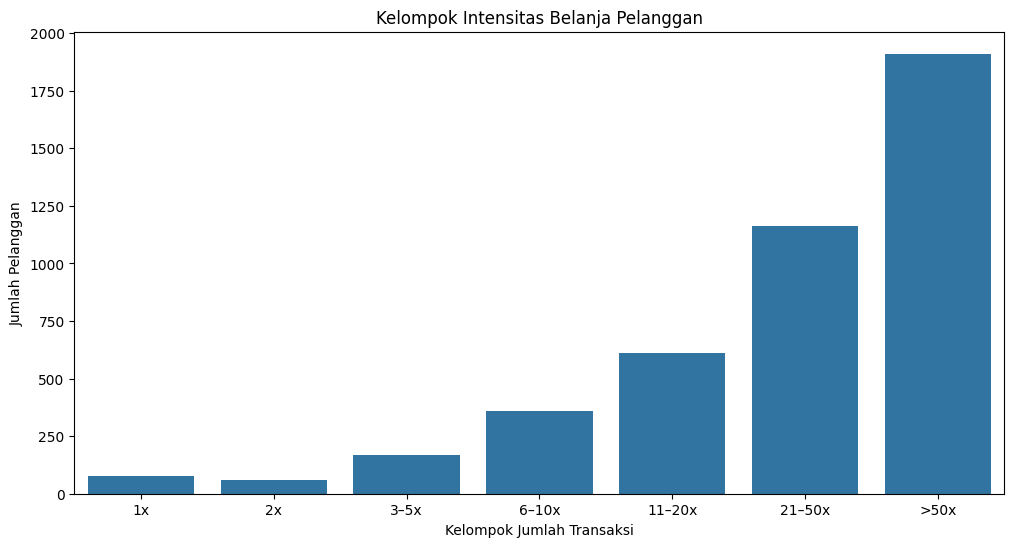

In [23]:
# Menampilkan histogram sebaran pelanggan berdasarkan intensitas belanja

freq = df["CustomerID"].value_counts()
bins = [1, 2, 5, 10, 20, 50, 100]
labels = ['1x', '2x', '3–5x', '6–10x', '11–20x', '21–50x', '>50x']
freq_grouped = pd.cut(freq, bins=[0,1,2,5,10,20,50,999], labels=labels, right=True)
count_grouped = freq_grouped.value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=count_grouped.index, y=count_grouped.values)
plt.title("Kelompok Intensitas Belanja Pelanggan")
plt.xlabel("Kelompok Jumlah Transaksi")
plt.ylabel("Jumlah Pelanggan")
plt.show()


# **Sebaran Pelanggan Berdasarkan Intensitas Belanja**
Berdasarkan histogram diatas menunjukan bahwa lebih dari 1000 oelanggan hanya melakukan 1 kali transaksi. Selanjutnya, jumlah pelanggan menurun drastis hingga hanya sekitar 400 pelanggan yang transaksi 2 kali dan jumlah pelanggan terus menurun hingga 51 kali transaksi. Hal ini menunjukan bahwa meskipun perusahaan memiliki beberapa pelanggan yang langganan cukup namun kebanyakan dari pelanggan merupakan pelanggan sekali beli.

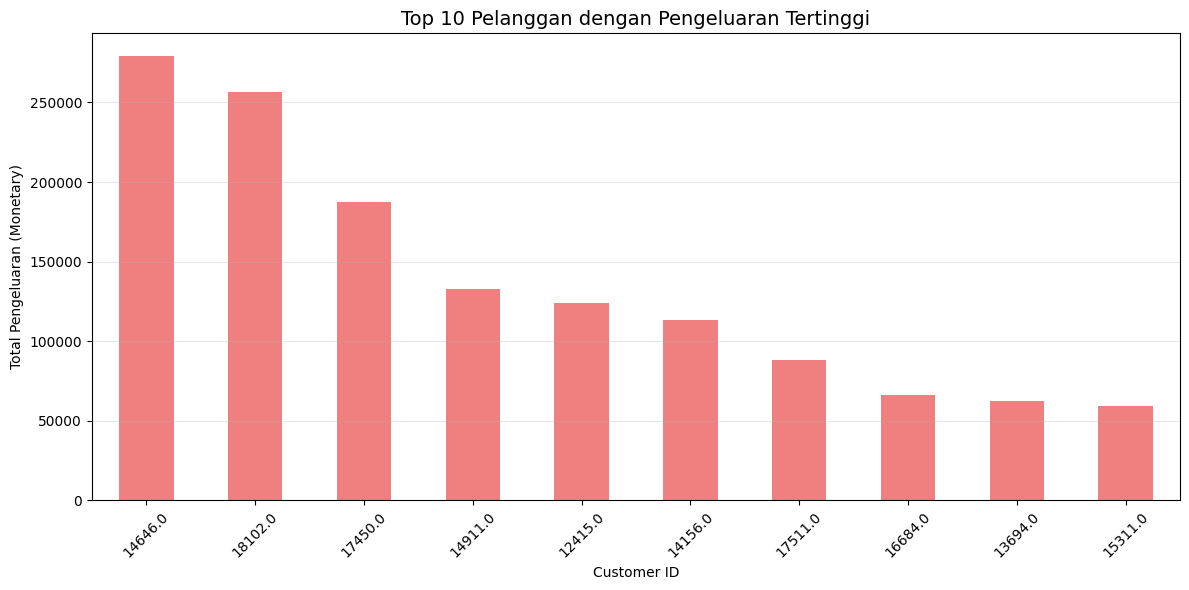

In [24]:
# Menampilkan ID customer dengan top 10 pelanggan dengan pengeluaran tertinggi

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
top10_monetary = monetary.head(10)

plt.figure(figsize=(12,6))
top10_monetary.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Pelanggan dengan Pengeluaran Tertinggi', fontsize=14)
plt.xlabel('Customer ID')
plt.ylabel('Total Pengeluaran (Monetary)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Top 10 Pelanggan dengan Pengeluaran Tertinggi**
Histogram diatas menampilakan Top 10 ID Customer dengan jumlah transaksi yang tinggi. Hal ini dapat dijadikan acuan untuk menganalisis tingat loyalitas pelanggan bagi perusahaan.

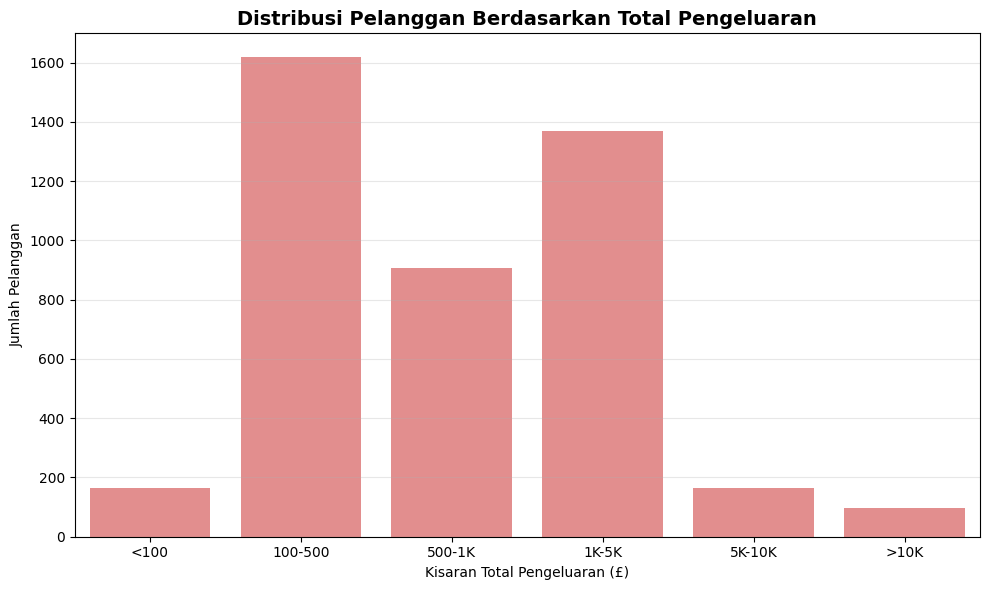

In [25]:
# Menampilkan distribusi pelanggan berdasarkan total pengeluaran

bins = [0, 100, 500, 1000, 5000, 10000, monetary.max()]
labels = ['<100', '100-500', '500-1K', '1K-5K', '5K-10K', '>10K']
monetary_bins = pd.cut(monetary, bins=bins, labels=labels)
monetary_dist = monetary_bins.value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=monetary_dist.index, y=monetary_dist.values, color='lightcoral')
plt.title('Distribusi Pelanggan Berdasarkan Total Pengeluaran', fontsize=14, weight='bold')
plt.xlabel('Kisaran Total Pengeluaran (£)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **Distribusi Pelanggan Berdasarkan Total Pengeluaran'**
Histogram diatas menampilkan bahwa kebanyakan pelanggan melakukan transaksi dengan nominal yang rendah hingga menengah dan sedikit sekali pelanggan yang melakukan transaksi lebih dari $5.000. Hal ini dapat disimpulkan bahwa pelanggan melakukan transaksi yang relatif kecil.

In [26]:
!git clone https://github.com/FairuzMaulidya/Capstone_Dicoding.git

Cloning into 'Capstone_Dicoding'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [27]:
%cd Capstone_Dicoding

/content/Capstone_Dicoding


In [28]:
!git branch

* main


In [29]:
!git checkout -b fairuz

Switched to a new branch 'fairuz'


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
!ls "/content/drive/MyDrive"

 0dbdbcc4-ac44-4dc0-b284-d6367268b490.jpeg
'0. MULTIPLE INTELLEGENCE.gslides'
 10043234166_e6dd915111_n.jpg
 10094729603_eeca3f2cb6.jpg
 10140303196_b88d3d6cec.jpg
 10172379554_b296050f82_n.jpg
 10172567486_2748826a8b.jpg
 10200780773_c6051a7d71_n.jpg
 1022552002_2b93faf9e7_n.jpg
 102501987_3cdb8e5394_n.jpg
 10294487385_92a0676c7d_m.jpg
 10300722094_28fa978807_n.jpg
 10386503264_e05387e1f7_m.jpg
 10386522775_4f8c616999_m.jpg
 10386525005_fd0b7d6c55_n.jpg
 10386525695_2c38fea555_n.jpg
 10386540106_1431e73086_m.jpg
 10386540696_0a95ee53a8_n.jpg
'10386702973_e74a34c806_n (1).jpg'
 10386702973_e74a34c806_n.jpg
 10391248763_1d16681106_n.jpg
 10437754174_22ec990b77_m.jpg
 10437770546_8bb6f7bdd3_m.jpg
 1044296388_912143e1d4.jpg
 10443973_aeb97513fc_m.jpg
 10477378514_9ffbcec4cf_m.jpg
 10486992895_20b344ce2d_n.jpg
 10503217854_e66a804309.jpg
 10541580714_ff6b171abd_n.jpg
 10555749515_13a12a026e.jpg
 10555815624_dc211569b0.jpg
 10555826524_423eb8bf71_n.jpg
 10617162044_8740d4dd9f_n.jpg
 1068318